LOAD THE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df=pd.read_csv('NaiveBayesData.csv')
df

,Feature_1,Feature_2,Target
0,0.733246,-1.431007,0
1,0.656043,0.842841,1
2,0.537983,-2.056550,0
3,1.289308,-0.079023,1
4,0.720124,0.977237,1
...,...,...,...
295,1.959063,1.482682,1
296,0.988996,-0.914247,0
297,2.046521,0.268611,1
298,0.122447,0.742480,1


In [3]:
df.head()

,Feature_1,Feature_2,Target
0,0.733246,-1.431007,0
1,0.656043,0.842841,1
2,0.537983,-2.056550,0
3,1.289308,-0.079023,1
4,0.720124,0.977237,1


In [14]:
df.describe()

,Feature_1,Feature_2,Target
count,300.000000,300.000000,300.000000
mean,0.967604,0.007175,0.500000
std,0.607250,1.229816,0.500835
min,-1.062240,-2.823751,0.000000
25%,0.621191,-1.089332,0.000000
50%,0.952689,-0.108417,0.500000
75%,1.289528,1.045620,1.000000
max,2.961783,2.885964,1.000000


In [4]:
df.tail()

,Feature_1,Feature_2,Target
295,1.959063,1.482682,1
296,0.988996,-0.914247,0
297,2.046521,0.268611,1
298,0.122447,0.742480,1
299,1.715959,1.168337,1


DATA PREPROCESSING

In [5]:
df.isnull().sum()

Feature_1    0
Feature_2    0
Target       0
dtype: int64

In [7]:
df.Target.value_counts()

Target
0    150
1    150
Name: count, dtype: int64

In [15]:
df.Target.value_counts(normalize=True)

Target
0    0.5
1    0.5
Name: proportion, dtype: float64

NORMALIZING DATA:
Normalizing the data can lead to faster training and better performance of the model. To address skewness in the data: Normalization in machine learning can help to address skewness in the data, which can be caused by outliers or by the data being distributed in a non-normal way.

In [8]:
X1 = df.drop('Target', axis=1)
y1 = df['Target']
X_normalized = (X1-X1.mean())/X1.std()
data = pd.DataFrame(X_normalized, columns=X1.columns)
data['Target'] = y1
print(data)

     Feature_1  Feature_2  Target
0    -0.385933  -1.169428       0
1    -0.513068   0.679504       1
2    -0.707485  -1.678076       0
3     0.529772  -0.070090       1
4    -0.407541   0.788786       1
..         ...        ...     ...
295   1.632705   1.199778       1
296   0.035228  -0.749236       0
297   1.776728   0.212581       1
298  -1.391777   0.597898       1
299   1.232368   0.944175       1

[300 rows x 3 columns]


IMPLEMENTING GAUSSIAN NAIVE BAYES AND SPLITTING DATA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop(columns='Target')
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [11]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred=gnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 SCORE:",f1_score(y_test,y_pred))

Accuracy: 0.95
Precision: 0.9428571428571428
Recall: 0.9705882352941176
F1 SCORE: 0.9565217391304348


Text(0.5, 1.0, 'Accuracy Score: 95.0')

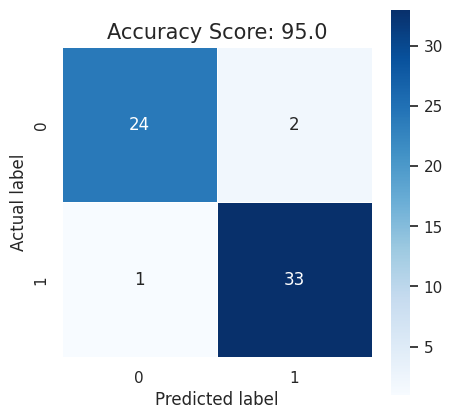

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5,annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(gnb.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

In [16]:
feature_names = ['Feature_1', 'Feature_2']
new_sample_df = pd.DataFrame({'Feature_1': [0.5], 'Feature_2': [-1.2]})
predicted_class = gnb.predict(new_sample_df)
print("Predicted class label for the new sample:", predicted_class)

Predicted class label for the new sample: [0]


In [17]:
feature_names = ['Feature_1', 'Feature_2']
new_sample_df = pd.DataFrame({'Feature_1': [1.5], 'Feature_2': [-0.2]})
predicted_class = gnb.predict(new_sample_df)
print("Predicted class label for the new sample:", predicted_class)

Predicted class label for the new sample: [0]


In [19]:
feature_names = ['Feature_1', 'Feature_2']
new_sample_df = pd.DataFrame({'Feature_1': [-1.507], 'Feature_2': [0.67]})
predicted_class = gnb.predict(new_sample_df)
print("Predicted class label for the new sample:", predicted_class)

Predicted class label for the new sample: [1]


In [20]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gnb,X,y,cv=5)
print("Cross Validated accuracy score:",score)
sm=score.mean()
print("Avg.cv score",sm)

Cross Validated accuracy score: [0.91666667 0.95       0.96666667 0.96666667 0.95      ]
Avg.cv score 0.95


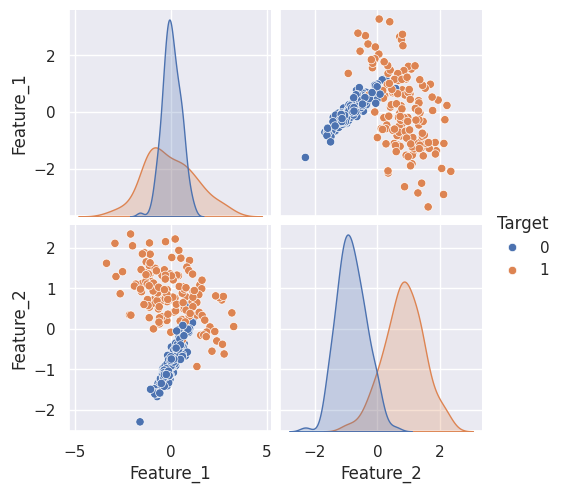

In [21]:
sns.pairplot(data, hue='Target')
plt.show()